<a href="https://colab.research.google.com/github/bazrafshanmh/hands-ml/blob/master/end2endMLproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
from functools import *
# !pip install ipympl seaborn scikit_learn
%matplotlib widget
plt.ion()

In [5]:
# Import libraries
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
def loadData():
  tarball_path = Path("datasets/housing.tgz")
  if not tarball_path.is_file():
    tarball_path = Path("datasets/housing.tgz")
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url="https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path="datasets")
  return pd.read_csv(Path("datasets/housing/housing.csv"))


In [6]:
housing = loadData()

## *Train_Test_split*

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

In [8]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0, 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

In [9]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

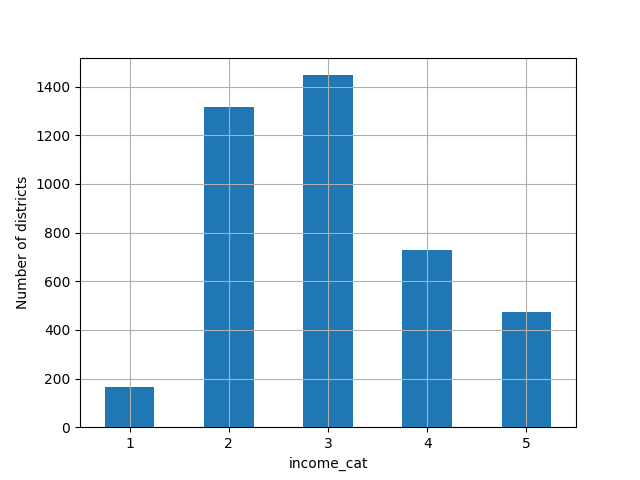

In [10]:
fig = plt.figure()
fig.clear()
plt.xlabel("Categorical Income")
plt.ylabel("Number of districts")
strat_test_set["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)

plt.show()


In [11]:
reduce(lambda a, b: a and b, [str("%.2f" % i)[:3]=="0.2" for i in strat_test_set["income_cat"].value_counts()/strat_train_set["income_cat"].value_counts()])

True

In [12]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

In [13]:
housing = strat_train_set.copy()


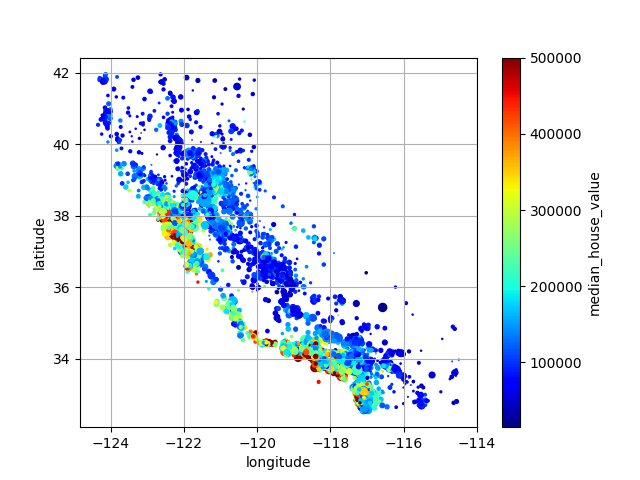

In [14]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, s=housing["population"]/200, c="median_house_value", cmap="jet", colorbar=True, legend=True, sharex=False)
plt.show()

In [15]:
corr_matrix = housing.loc[:, ~housing.columns.str.contains('ocean_proximity')].corr()

In [16]:
corr_matrix["median_house_value"]

longitude            -0.050859
latitude             -0.139584
housing_median_age    0.102175
total_rooms           0.137455
total_bedrooms        0.054635
population           -0.020153
households            0.071426
median_income         0.688380
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [17]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [18]:
# from seaborn import heatmap
# corr_matrix=housing.loc[:, ~housing.columns.str.contains('ocean_proximity')].corr()
# fig = plt.figure()
# fig.clear()
# heatmap(corr_matrix)

In [19]:
corr_matrix["median_house_value"]

longitude            -0.050859
latitude             -0.139584
housing_median_age    0.102175
total_rooms           0.137455
total_bedrooms        0.054635
population           -0.020153
households            0.071426
median_income         0.688380
median_house_value    1.000000
Name: median_house_value, dtype: float64

# Seperate X and Y

In [20]:
X_train, y_train = strat_train_set.drop("median_house_value", axis=1), strat_train_set["median_house_value"].copy()
X_test, y_test = strat_test_set.drop("median_house_value", axis=1), strat_test_set["median_house_value"].copy()

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
housing_num = housing.select_dtypes(include=[np.number])
imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(housing_num)
housing_num = pd.DataFrame(imputed, columns=housing_num.columns, index=housing_num.index)

Category Encoding

In [22]:
from sklearn.preprocessing import OneHotEncoder
housing_cat = housing[["ocean_proximity"]]
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)


In [23]:
# housing_cat_1hot.toarray().shape
housing_cat_prepared= pd.DataFrame(housing_cat_1hot.toarray(), columns=cat_encoder.get_feature_names_out(), index=housing_cat.index)

# Feature Scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = scaler.fit_transform(housing_num)
housing_num_min_max_scaled = pd.DataFrame(housing_num_min_max_scaled, columns=housing_num.columns, index=housing_num.index)


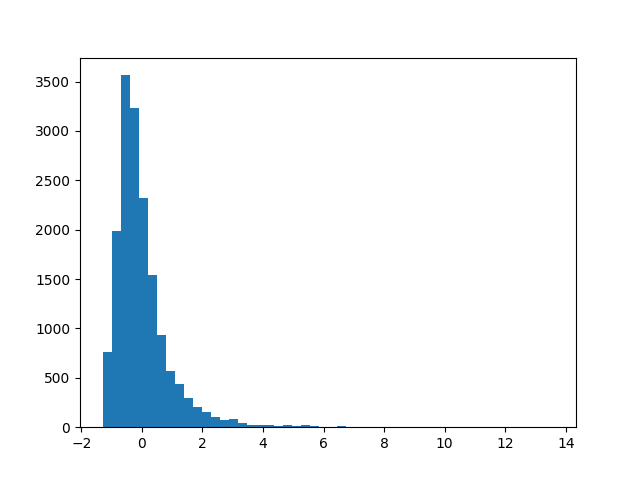

In [25]:
fig = plt.figure()
fig.clear()
from sklearn.preprocessing import StandardScaler
Sscaler = StandardScaler()
scaled = Sscaler.fit_transform(housing_num)
scaled = pd.DataFrame(scaled, housing_num.index, columns=housing_num.columns)
plt.hist(scaled["population"], bins=50)
plt.show()



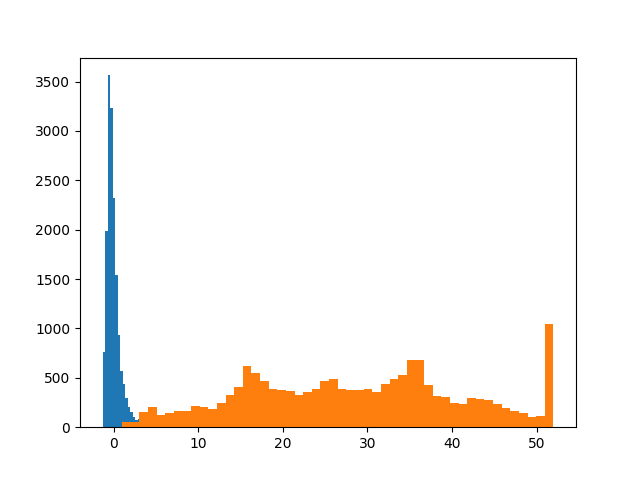

In [26]:
plt.hist(housing["housing_median_age"], bins=50)
plt.show()

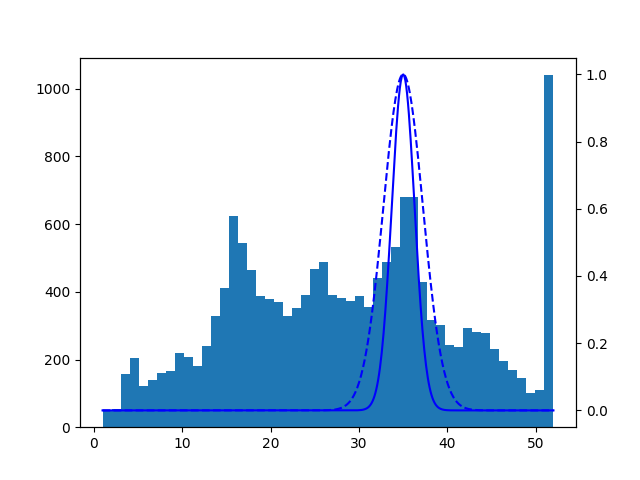

In [27]:
gamma1 = 0.1
gamma2 = 0.3
from sklearn.metrics.pairwise import rbf_kernel
ages=np.linspace(housing["housing_median_age"].min(), housing["housing_median_age"].max(), 500).reshape(-1, 1)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.plot(ages, rbf_kernel(ages, [[35]], gamma=gamma1), color="blue", linestyle="--")
ax2.plot(ages, rbf_kernel(ages, [[35]], gamma=gamma2), color="blue", linestyle="-")

ax1.hist(housing["housing_median_age"], bins=50)

plt.show()


In [28]:
for i in range(20):
    plt.close(i)

# FunctionTransformer

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 4.000e+00,
        2.000e+00, 1.000e+00, 6.000e+00, 1.000e+00, 4.000e+00, 6.000e+00,
        1.200e+01, 1.300e+01, 1.300e+01, 1.400e+01, 2.300e+01, 2.400e+01,
        1.600e+01, 3.400e+01, 2.200e+01, 4.800e+01, 5.000e+01, 5.900e+01,
        7.900e+01, 1.110e+02, 1.430e+02, 2.130e+02, 3.290e+02, 4.940e+02,
        7.330e+02, 1.133e+03, 1.547e+03, 1.818e+03, 1.953e+03, 1.862e+03,
        1.690e+03, 1.330e+03, 8.950e+02, 6.460e+02, 4.380e+02, 3.040e+02,
        1.850e+02, 9.000e+01, 6.300e+01, 5.800e+01, 2.200e+01, 1.200e+01,
        7.000e+00, 3.000e+00]),
 array([1.09861229, 1.27062458, 1.44263688, 1.61464918, 1.78666147,
        1.95867377, 2.13068606, 2.30269836, 2.47471066, 2.64672295,
        2.81873525, 2.99074754, 3.16275984, 3.33477214, 3.50678443,
        3.67879673, 3.85080902, 4.02282132, 4.19483362, 4.36684591,
        4.53885821, 4.7108705 , 4.8828828 , 5.0548951 , 5.22690739,
        5.39891969, 5.57093198, 5.74

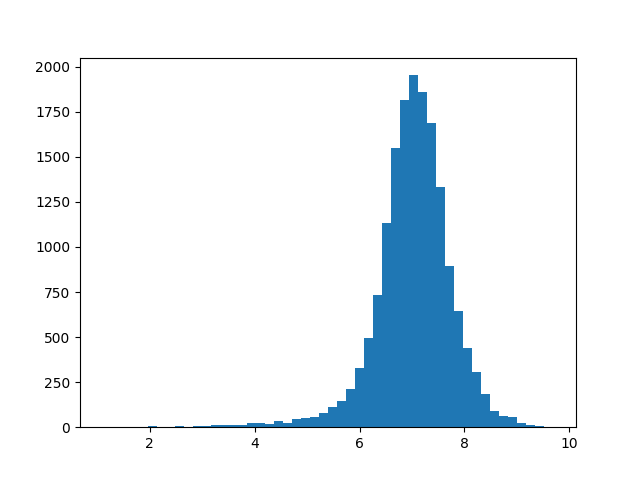

In [29]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, np.exp)
log_pop = log_transformer.transform(housing["population"])
fig = plt.figure()
plt.hist(log_pop, bins=50)

In [30]:
rbf_transformer = FunctionTransformer(rbf_kernel, kw_args={'Y':[[34]], 'gamma':0.1})
age_sim_35 = rbf_transformer.transform(np.array(housing["population"]).reshape(-1,1))


In [31]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]]/X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

# PAIN

In [32]:
from sklearn.base import TransformerMixin, BaseEstimator

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):
        self.with_mean = with_mean

    def fit(self, X, y=None):
        X = check_array(X)
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in = X.shape[1]
        return self

    def transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        assert self.n_features_in == X.shape[1]
        if self.with_mean:
            X=X-self.mean_
        return X/self.scale_

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [34]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [35]:
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared = pd.DataFrame(housing_num_prepared, housing_num.index, num_pipeline.get_feature_names_out())
num_attributes = list(housing_num_prepared.columns)
cat_attributes = list(cat_encoder.get_feature_names_out())
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [36]:
housing_prepared = preprocessing.fit_transform(housing)

In [37]:
housing_prepared = pd.DataFrame(housing_prepared, index=housing.index, columns=preprocessing.get_feature_names_out())

In [38]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1., random_state=None):
        self.n_clusters=n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight = None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self # always return it
    def transform(self, X):
        # check_is_fitted(self)
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]



In [39]:
#In his name
from sklearn.compose import ColumnTransformer
def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out= ratio_name),
        StandardScaler())

column_ratio = lambda X: X[:, [0]]/X[:, [1]]

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, np.exp, feature_names_out="one-to-one"),
    StandardScaler()
)
cluster_simi = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ['population', 'households']),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", 'households', 'median_income']),
    ('geo', cluster_simi, ["latitude", "longitude"]),
    ('cat', cat_pipeline, make_column_selector(dtype_include=object))], remainder=default_num_pipeline)




In [40]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared_pd = pd.DataFrame(housing_prepared, housing.index, preprocessing.get_feature_names_out())

In [41]:
housing_prepared_pd.head()

,bedrooms__ratio,rooms_per_house__ratio,people_per_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,geo__Cluster 0 similarity,geo__Cluster 1 similarity,...,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__housing_median_age,remainder__median_house_value,remainder__rooms_per_house,remainder__bedrooms_ratio,remainder__people_per_house
13096,1.846624,-0.866027,-0.330204,1.324114,0.637892,0.456906,1.310369,-1.071522,3.788947e-18,1.319640e-01,...,0.0,0.0,0.0,1.0,0.0,1.861119,2.185112,-0.866027,2.153743,-0.330204
14973,-0.508121,0.024550,-0.253616,-0.252671,-0.063576,-0.711654,-0.142030,1.194712,3.346712e-01,1.735776e-09,...,1.0,0.0,0.0,0.0,0.0,0.907630,2.406254,0.024550,-0.569651,-0.253616
3785,-0.202155,-0.041193,-0.051041,-0.925266,-0.859927,-0.941997,-0.913030,-0.756981,2.874903e-18,2.749482e-01,...,0.0,1.0,0.0,0.0,0.0,0.351428,-0.907406,-0.041193,-0.215784,-0.051041
14689,-0.149006,-0.034858,-0.141475,0.952773,0.943475,0.670700,0.925373,-0.912253,8.832834e-01,2.237307e-14,...,0.0,1.0,0.0,0.0,0.0,-0.919891,-0.955971,-0.034858,-0.154314,-0.141475
20507,0.963208,-0.666554,-0.306148,1.437622,1.003590,0.719093,1.481464,0.034537,4.893551e-01,2.891966e-11,...,0.0,0.0,0.0,0.0,1.0,0.589800,1.348242,-0.666554,1.132023,-0.306148


# MODEL

In [42]:
# In his name

from sklearn.linear_model import LinearRegression

lin_reg = Pipeline([('prep', preprocessing), ('regressor', LinearRegression())])
lin_reg.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7d7c192b70a0>,
                                                                                       fu...
                                                   'households',
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d7c192af9d0>)])),
                ('regressor', LinearRegression())])

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def printTotalScore(y_true, y_pred):
    return f"\tr2score: {r2_score(y_true, y_pred)}\n\tRMSE:    {mean_squared_error(y_true, y_pred)**0.5}"

In [51]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(X_train, y_train)
# mean_squared_error(tree_reg.predict(X_train[:5]), y_train[:5])**0.5
# tree_reg.score(X_train, y_train)

1.0

In [53]:
from sklearn.model_selection import cross_val_score
tree_rmses = cross_val_score(tree_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)


array([-66506.70121103, -67097.20497743, -66144.65155743, -65069.22056897,
       -64727.51994473, -70094.77824639, -67685.73110573, -68411.33556978,
       -69293.5932016 , -63649.53649274])

In [58]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_reg.fit(X_train, y_train)
rmses = -cross_val_score(forest_reg, X_train, y_train,
scoring="neg_root_mean_squared_error", cv=10)


In [60]:
pd.Series(rmses).describe()

count       10.000000
mean     47019.561281
std       1033.957120
min      45458.112527
25%      46464.031184
50%      46967.596354
75%      47325.694987
max      49243.765795
dtype: float64

In [56]:
pd.Series(tree_rmses).describe()

count       10.000000
mean    -66868.027288
std       2060.966425
min     -70094.778246
25%     -68229.934454
50%     -66801.953094
75%     -65338.078316
max     -63649.536493
dtype: float64